<a href="https://colab.research.google.com/github/deepankan-rai/LogisticRegressionModel/blob/main/ClassificationLogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve

In [2]:
try:
    df = pd.read_csv('data.csv')
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please make sure the file is in the same directory or provide the correct path.")
    exit()

In [3]:
print(df.head())
print("\n--- Data Info ---")
df.info()

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:
df = df.drop(columns=['id', 'Unnamed: 32'], axis=1, errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
print("\nLogistic Regression model trained successfully!")


Logistic Regression model trained successfully!


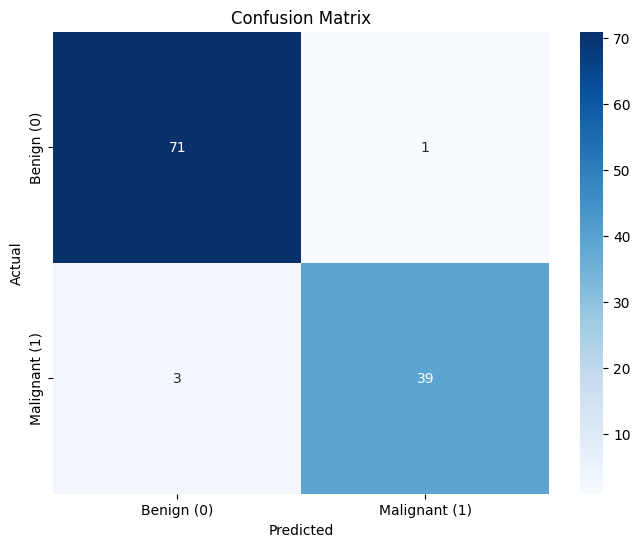

In [7]:
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


               precision    recall  f1-score   support

   Benign (0)       0.96      0.99      0.97        72
Malignant (1)       0.97      0.93      0.95        42

     accuracy                           0.96       114
    macro avg       0.97      0.96      0.96       114
 weighted avg       0.97      0.96      0.96       114

ROC-AUC Score: 0.9960


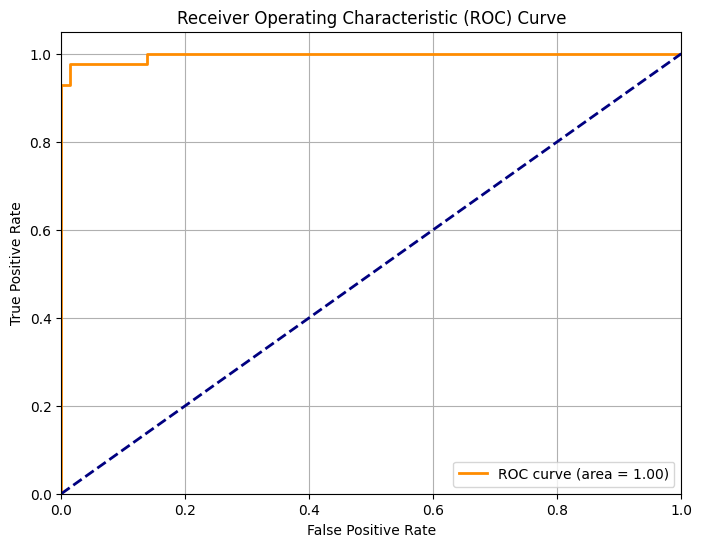

In [9]:
print(classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malignant (1)']))
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {auc_score:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

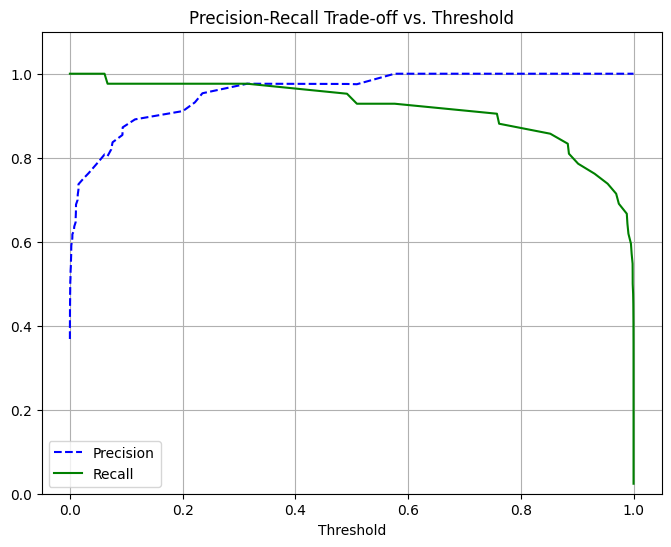

In [10]:
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(thresholds_pr, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds_pr, recalls[:-1], "g-", label="Recall")
plt.title('Precision-Recall Trade-off vs. Threshold')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.ylim([0, 1.1])
plt.show()


Classification Report with Threshold = 0.3
               precision    recall  f1-score   support

   Benign (0)       0.99      0.99      0.99        72
Malignant (1)       0.98      0.98      0.98        42

     accuracy                           0.98       114
    macro avg       0.98      0.98      0.98       114
 weighted avg       0.98      0.98      0.98       114

Notice how lowering the threshold might increase recall (catching more malignant cases) at the cost of precision (more false positives).


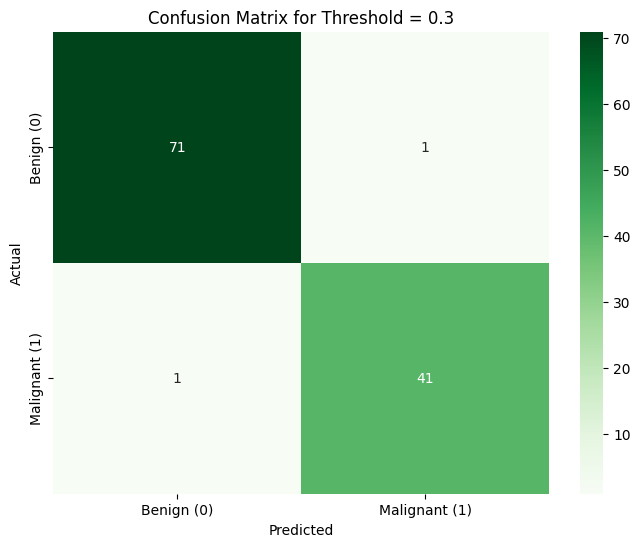

In [12]:
new_threshold = 0.3
y_pred_new_threshold = (y_pred_proba >= new_threshold).astype(int)

print(f"\nClassification Report with Threshold = {new_threshold}")
print(classification_report(y_test, y_pred_new_threshold, target_names=['Benign (0)', 'Malignant (1)']))
print("Notice how lowering the threshold might increase recall (catching more malignant cases) at the cost of precision (more false positives).")

cm_new = confusion_matrix(y_test, y_pred_new_threshold)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title(f'Confusion Matrix for Threshold = {new_threshold}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
